In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Loading the Advertising Data

In [31]:
df = pd.read_csv("Advertising.csv")
print(df.shape)
print(df.columns)

(200, 5)
Index(['S_No', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


Running Single Variable Regression

In [3]:
# X = df[['TV','radio','newspaper']]
X = df[['TV']]
y = df[['sales']]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.611875050850071
[[0.04753664]]
[7.03259355]


In [4]:
y_pred = reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Mean squared error: 10.51
Coefficient of determination: 0.61


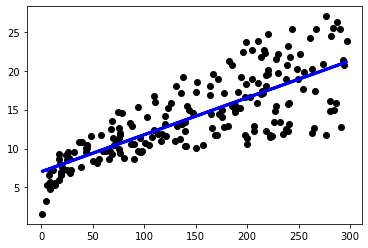

In [5]:
plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

Running the Regression on Test Data and Analyze the Difference in R2 and MSE

In [7]:
# repeat this activity multiple times and record the R2 and MSE for each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
reg2 = LinearRegression().fit(X_train, y_train)
print(reg2.score(X, y))
print(reg2.coef_)
print(reg2.intercept_)
y_pred_test = reg2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

0.6110891546096515
[[0.04772077]]
[6.86047398]
Mean squared error: 10.06
Coefficient of determination: 0.600


In [11]:
#repeat the activity for radio and newspaper as well

Multiple Linear Regression

In [9]:
# 2 variables
#X = df[['TV','radio','newspaper']]
X = df[['TV','radio']]
y = df[['sales']]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))

0.8971942610828957
[[0.04575482 0.18799423]]
[2.92109991]
Mean squared error: 2.78
Coefficient of determination: 0.897


In [10]:
# train test split
#X = df[['TV','radio','newspaper']]
X = df[['TV','radio']]
y = df[['sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
reg2 = LinearRegression().fit(X_train, y_train)
print(reg2.score(X_train, y_train))
print(reg2.coef_)
print(reg2.intercept_)
y_pred_test = reg2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

0.9052258241095261
[[0.04761796 0.18300295]]
[2.71049139]
Mean squared error: 3.44
Coefficient of determination: 0.875


In [11]:
# 3 variables
X = df[['TV','radio','newspaper']]
#X = df[['TV','radio']]
y = df[['sales']]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))

0.8972106381789521
[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]
Mean squared error: 2.78
Coefficient of determination: 0.897


In [28]:
# train test split - 3 variables
X = df[['TV','radio','newspaper']]
#X = df[['TV','radio']]
y = df[['sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
reg2 = LinearRegression().fit(X_train, y_train)
print(reg2.score(X_train, y_train))
print(reg2.coef_)
print(reg2.intercept_)
y_pred_test = reg2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))


0.8873314597889973
[[ 0.04587108  0.1883532  -0.0030418 ]]
[3.00027651]
Mean squared error: 2.91
Coefficient of determination: 0.887


In [14]:
#compute correlation matrix
X2 = df.drop(columns=['S_No'])
X2.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Using Statsmodel Library

In [22]:
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        14:23:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Interaction Model

In [19]:
X = df[['TV','radio']]
X['TV_Radio'] = df['TV']*df['radio']
print(X.shape)
X.head()

(200, 3)


<ipython-input-19-4924abfbcf59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TV_Radio'] = df['TV']*df['radio']


,TV,radio,TV_Radio
0,230.1,37.8,8697.78
1,44.5,39.3,1748.85
2,17.2,45.9,789.48
3,151.5,41.3,6256.95
4,180.8,10.8,1952.64


In [30]:
y = df[['sales']]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))

0.8972106381789521
[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]
Mean squared error: 2.78
Coefficient of determination: 0.897


In [21]:
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          6.68e-146
Time:                        15:52:06   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

In [22]:
#show it for test data as well

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(2,interaction_only=True)
X = X = df[['TV','radio']]
y = df[['sales']]
X2 = poly.fit_transform(X)
print(X2.shape)
print(poly.get_feature_names_out())
X2 = sm.add_constant(X2)
mod = sm.OLS(y, X2)
res = mod.fit()
print(res.summary())

(200, 4)
['1' 'TV' 'radio' 'TV radio']
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          6.68e-146
Time:                        15:52:14   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [25]:
poly = PolynomialFeatures(2) #,interaction_only=True)
X = df[['TV','radio']]
y = df[['sales']]
X2 = poly.fit_transform(X)
print(X2.shape)
print(poly.get_feature_names_out())
X2 = sm.add_constant(X2)
mod = sm.OLS(y, X2)
res = mod.fit()
print(res.summary())

(200, 6)
['1' 'TV' 'radio' 'TV^2' 'TV radio' 'radio^2']
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2740.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          8.17e-178
Time:                        15:52:23   Log-Likelihood:                -186.54
No. Observations:                 200   AIC:                             385.1
Df Residuals:                     194   BIC:                             404.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Feature Selection (Forward and Backward)

In [26]:
from sklearn.feature_selection import SequentialFeatureSelector

Multiple Regression and Feature Selection using Boston Data

In [28]:
df = pd.read_csv("Boston.csv")
print(df.shape)
print(df.columns)

(506, 14)
Index(['s_no', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')


In [29]:
X = df.drop(columns=['s_no','medv'])
print(X.shape)
y = df[['medv']]

(506, 12)


In [30]:
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          2.23e-133
Time:                        15:52:48   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

In [31]:
ols_reg = LinearRegression()
sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=5)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

['crim' 'chas' 'rm' 'ptratio' 'lstat']


In [32]:
ols_reg = LinearRegression()
sfs = SequentialFeatureSelector(ols_reg, direction='backward',n_features_to_select=5)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

['zn' 'nox' 'dis' 'ptratio' 'lstat']


Automating Polynomial Regression and Interaction

In [33]:
poly = PolynomialFeatures(2)
X = df.drop(columns=['s_no','medv'])
y = df[['medv']]
X2 = poly.fit_transform(X)
print(X2.shape)
print(poly.get_feature_names_out())
X2 = sm.add_constant(X2)
mod = sm.OLS(y, X2)
res = mod.fit()
print(res.summary())

(506, 91)
['1' 'crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax'
 'ptratio' 'lstat' 'crim^2' 'crim zn' 'crim indus' 'crim chas' 'crim nox'
 'crim rm' 'crim age' 'crim dis' 'crim rad' 'crim tax' 'crim ptratio'
 'crim lstat' 'zn^2' 'zn indus' 'zn chas' 'zn nox' 'zn rm' 'zn age'
 'zn dis' 'zn rad' 'zn tax' 'zn ptratio' 'zn lstat' 'indus^2' 'indus chas'
 'indus nox' 'indus rm' 'indus age' 'indus dis' 'indus rad' 'indus tax'
 'indus ptratio' 'indus lstat' 'chas^2' 'chas nox' 'chas rm' 'chas age'
 'chas dis' 'chas rad' 'chas tax' 'chas ptratio' 'chas lstat' 'nox^2'
 'nox rm' 'nox age' 'nox dis' 'nox rad' 'nox tax' 'nox ptratio'
 'nox lstat' 'rm^2' 'rm age' 'rm dis' 'rm rad' 'rm tax' 'rm ptratio'
 'rm lstat' 'age^2' 'age dis' 'age rad' 'age tax' 'age ptratio'
 'age lstat' 'dis^2' 'dis rad' 'dis tax' 'dis ptratio' 'dis lstat' 'rad^2'
 'rad tax' 'rad ptratio' 'rad lstat' 'tax^2' 'tax ptratio' 'tax lstat'
 'ptratio^2' 'ptratio lstat' 'lstat^2']
                            OLS Regress

In [34]:
poly = PolynomialFeatures(2,interaction_only=True)
X = df.drop(columns=['s_no','medv'])
y = df[['medv']]
X2 = poly.fit_transform(X)
print(X2.shape)
print(poly.get_feature_names_out())
X2 = sm.add_constant(X2)
mod = sm.OLS(y, X2)
res = mod.fit()
print(res.summary())

(506, 79)
['1' 'crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax'
 'ptratio' 'lstat' 'crim zn' 'crim indus' 'crim chas' 'crim nox' 'crim rm'
 'crim age' 'crim dis' 'crim rad' 'crim tax' 'crim ptratio' 'crim lstat'
 'zn indus' 'zn chas' 'zn nox' 'zn rm' 'zn age' 'zn dis' 'zn rad' 'zn tax'
 'zn ptratio' 'zn lstat' 'indus chas' 'indus nox' 'indus rm' 'indus age'
 'indus dis' 'indus rad' 'indus tax' 'indus ptratio' 'indus lstat'
 'chas nox' 'chas rm' 'chas age' 'chas dis' 'chas rad' 'chas tax'
 'chas ptratio' 'chas lstat' 'nox rm' 'nox age' 'nox dis' 'nox rad'
 'nox tax' 'nox ptratio' 'nox lstat' 'rm age' 'rm dis' 'rm rad' 'rm tax'
 'rm ptratio' 'rm lstat' 'age dis' 'age rad' 'age tax' 'age ptratio'
 'age lstat' 'dis rad' 'dis tax' 'dis ptratio' 'dis lstat' 'rad tax'
 'rad ptratio' 'rad lstat' 'tax ptratio' 'tax lstat' 'ptratio lstat']
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                

kNN Regression Method

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
neigh = KNeighborsRegressor(n_neighbors=5)
X = df[['TV','radio']]
y = df[['sales']]
knn_reg = neigh.fit(X, y)
print(knn_reg.score(X, y))
#print(reg.coef_)
#print(reg.intercept_)
y_pred = knn_reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))

0.9766548777158833
Mean squared error: 0.63
Coefficient of determination: 0.977


In [40]:
neigh = KNeighborsRegressor(n_neighbors=3)
X = df[['TV','radio']]
y = df[['sales']]
knn_reg = neigh.fit(X, y)
print(knn_reg.score(X, y))
#print(reg.coef_)
#print(reg.intercept_)
y_pred = knn_reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))

0.9855520550978655
Mean squared error: 0.39
Coefficient of determination: 0.986


In [41]:
sfs = SequentialFeatureSelector(neigh, n_features_to_select=1)
sfs.fit(X, y)
print(sfs.get_support())
print(sfs.get_feature_names_out())

[ True False]
['TV']


In [43]:
neigh = KNeighborsRegressor(n_neighbors=3)
#X = df[['TV','radio']]
#y = df[['sales']]
knn_reg = neigh.fit(X, y)
print(knn_reg.score(X, y))
#print(reg.coef_)
#print(reg.intercept_)
y_pred = knn_reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))

0.9855520550978655
Mean squared error: 0.39
Coefficient of determination: 0.986


In [47]:
sfs = SequentialFeatureSelector(neigh, direction='forward',n_features_to_select=1)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

['TV']


In [49]:
sfs = SequentialFeatureSelector(neigh, direction='backward',n_features_to_select=5)
sfs.fit(X, y)
print(sfs.get_feature_names_out())

ValueError: n_features_to_select must be either None, an integer in [1, n_features - 1] representing the absolute number of features, or a float in (0, 1] representing a percentage of features to select. Got 5